**Set up**

Comenzamos el código importando las librerías que usaremos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import scipy
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.tsa.stattools as stattools
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Cargamos una base de datos de ejemplo, dta

In [ ]:
dta = sm.datasets.macrodata.load_pandas().data

In [ ]:
# Este tipo de formato de dato se llama dataframe (pd.DataFrame)
dta.index

RangeIndex(start=0, stop=203, step=1)

Dado que tenemos al año y al trimestre en columnas distintas del data frame dta entonces usamos pd.Index junto a sm.tsa.datetools.dates_from_range para agregarle una columna nueva con las fechas ordenadas.

In [ ]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
index


DatetimeIndex(['1959-03-31', '1959-06-30', '1959-09-30', '1959-12-31',
               '1960-03-31', '1960-06-30', '1960-09-30', '1960-12-31',
               '1961-03-31', '1961-06-30',
               ...
               '2007-06-30', '2007-09-30', '2007-12-31', '2008-03-31',
               '2008-06-30', '2008-09-30', '2008-12-31', '2009-03-31',
               '2009-06-30', '2009-09-30'],
              dtype='datetime64[ns]', length=203, freq=None)

Eliminamos las variables de año y trimestre que no usaremos

In [ ]:
dta.index = index
del dta['year']
del dta['quarter']
dta['ttrend'] = range(len(dta.realgdp)) 
dta['ttrend'] = dta['ttrend'] + 1


In [ ]:
dta

,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,ttrend
1959-03-31,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00,1
1959-06-30,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74,2
1959-09-30,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09,3
1959-12-31,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06,4
1960-03-31,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33,199
2008-12-31,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91,200
2009-03-31,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71,201
2009-06-30,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19,202


In [ ]:
# np.log -> logaritmo natural (ln)
dta["lnrealgdp"] = np.log(dta.realgdp)

Vemos las notas de la base de datos

In [ ]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [ ]:
print(dta.head(10))

             realgdp  realcons  realinv  ...  realint  ttrend  lnrealgdp
1959-03-31  2710.349    1707.4  286.898  ...     0.00       1   7.904833
1959-06-30  2778.801    1733.7  310.859  ...     0.74       2   7.929775
1959-09-30  2775.488    1751.8  289.226  ...     1.09       3   7.928582
1959-12-31  2785.204    1753.7  299.356  ...     4.06       4   7.932076
1960-03-31  2847.699    1770.5  331.722  ...     1.19       5   7.954267
1960-06-30  2834.390    1792.9  298.152  ...     2.55       6   7.949582
1960-09-30  2839.022    1785.8  296.375  ...    -0.34       7   7.951215
1960-12-31  2802.616    1788.2  259.764  ...     1.08       8   7.938309
1961-03-31  2819.264    1787.7  266.405  ...     2.77       9   7.944231
1961-06-30  2872.005    1814.3  286.246  ...     0.81      10   7.962766

[10 rows x 14 columns]


Graficamos las series

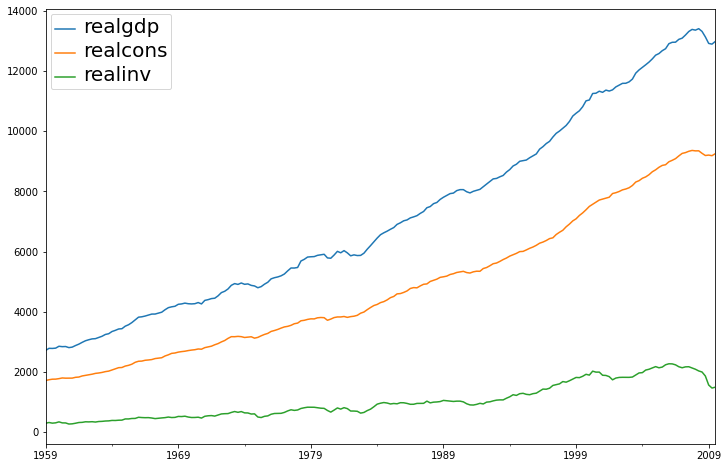

In [ ]:
# Real GDP
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dta.realgdp.plot(ax=ax);
dta.realcons.plot(ax=ax);
dta.realinv.plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(20);
plt.show()
plt.close()




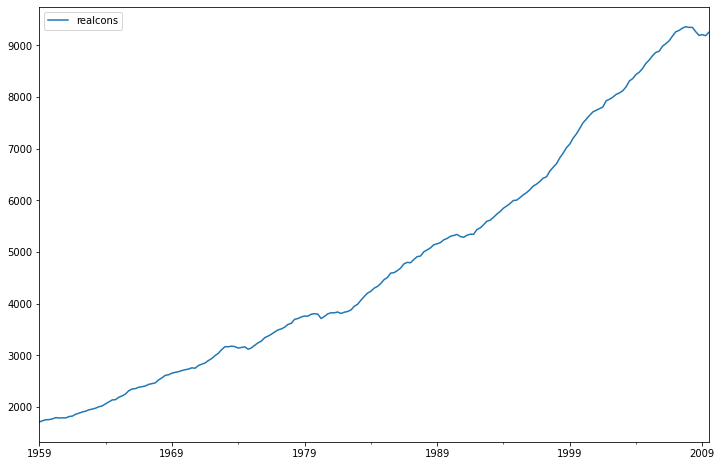

In [ ]:
#Real Consumption
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dta.realcons.plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(20);

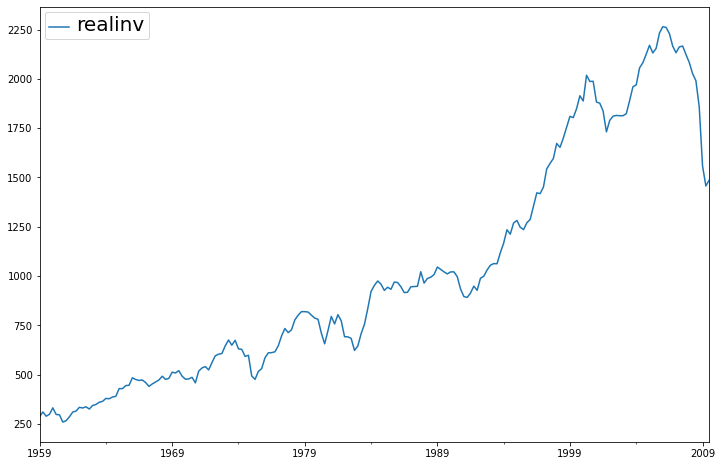

In [ ]:
#Real Investment
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dta.realinv.plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(20);

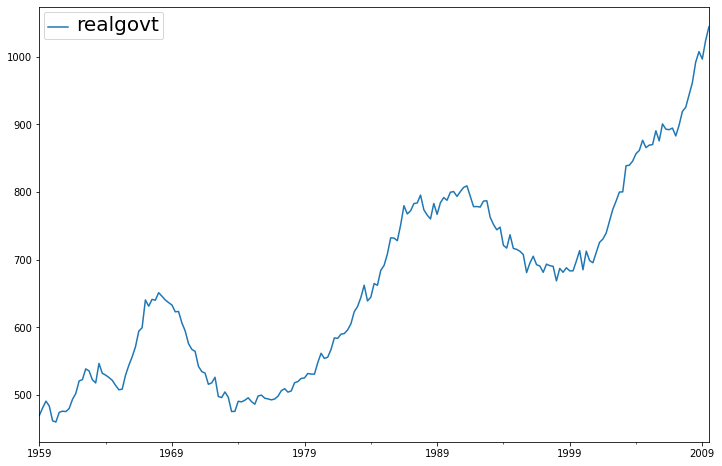

In [ ]:
#Real G
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dta.realgovt.plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(20);

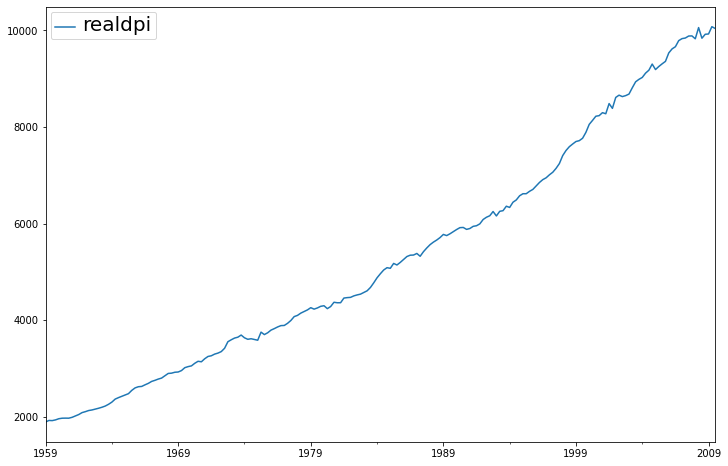

In [ ]:
#Real DPI
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dta.realdpi.plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(20);

**Tendencias**

Estimamos distintos modelos de tendencias 

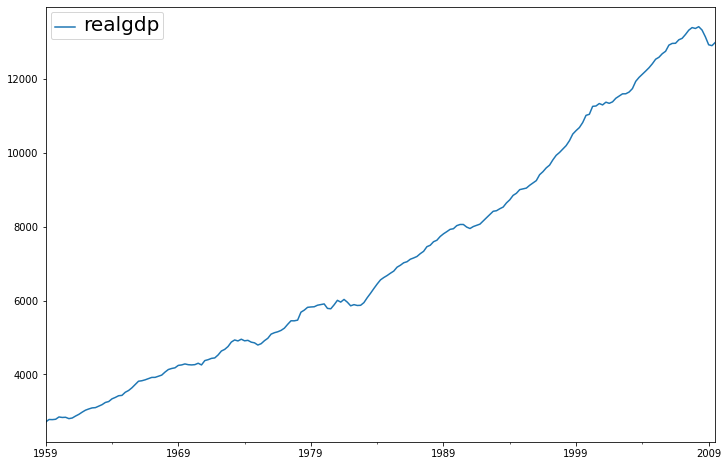

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dta.realgdp.plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(20);
legend.prop.set_size(20);

In [ ]:
# 1. Tendencia determinística

Y = pd.DataFrame(dta.lnrealgdp)
X = pd.DataFrame(dta.ttrend)
X,Y

(            ttrend
 1959-03-31       1
 1959-06-30       2
 1959-09-30       3
 1959-12-31       4
 1960-03-31       5
 ...            ...
 2008-09-30     199
 2008-12-31     200
 2009-03-31     201
 2009-06-30     202
 2009-09-30     203
 
 [203 rows x 1 columns],             lnrealgdp
 1959-03-31   7.904833
 1959-06-30   7.929775
 1959-09-30   7.928582
 1959-12-31   7.932076
 1960-03-31   7.954267
 ...               ...
 2008-09-30   9.497367
 2008-12-31   9.483562
 2009-03-31   9.466950
 2009-06-30   9.465099
 2009-09-30   9.471961
 
 [203 rows x 1 columns])

In [ ]:
X = sm.add_constant(X)
modelo = sm.OLS(Y,X)
resultados_d_trend = modelo.fit()
resultados_d_trend.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              lnrealgdp   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 3.234e+04
Date:                Wed, 09 Jun 2021   Prob (F-statistic):          5.31e-224
Time:                        00:07:47   Log-Likelihood:                 383.95
No. Observations:                 203   AIC:                            -763.9
Df Residuals:                     201   BIC:                            -757.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9750      0.005   1542.904      0.000       7.965       7.985
ttrend         0.0079   4.39e-05    179.829      0.000       0.008       0.008
==============================================================================
Omnibus:                       19.880   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.628
Skew:                          -0.787   Prob(JB):                     1.22e-05
Kurtosis:                       3.444   Cond. No.                         236.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Y_predict = modelo.fit().predict(X)
dta["Y_hat"] = Y_predict

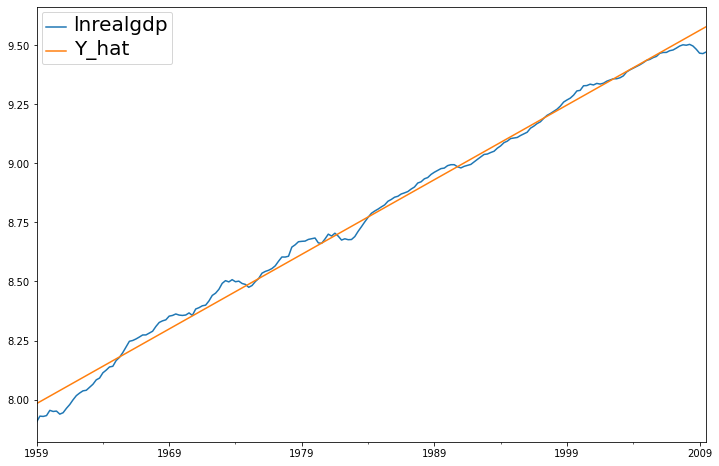

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dta.lnrealgdp.plot(ax=ax);
dta.Y_hat.plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(20);

In [ ]:
dta

,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,ttrend,lnrealgdp,Y_hat
1959-03-31,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00,1,7.904833,7.982920
1959-06-30,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74,2,7.929775,7.990822
1959-09-30,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09,3,7.928582,7.998724
1959-12-31,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06,4,7.932076,8.006625
1960-03-31,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19,5,7.954267,8.014527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33,199,9.497367,9.547438
2008-12-31,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91,200,9.483562,9.555339
2009-03-31,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71,201,9.466950,9.563241
2009-06-30,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19,202,9.465099,9.571142


In [ ]:
#Detrended series
dta["Y_detrended"] = dta['lnrealgdp'] - dta['Y_hat']

In [ ]:
dta

,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,ttrend,lnrealgdp,Y_hat,Y_detrended
1959-03-31,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00,1,7.904833,7.982920,-0.078088
1959-06-30,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74,2,7.929775,7.990822,-0.061047
1959-09-30,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09,3,7.928582,7.998724,-0.070142
1959-12-31,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06,4,7.932076,8.006625,-0.074549
1960-03-31,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19,5,7.954267,8.014527,-0.060260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33,199,9.497367,9.547438,-0.050070
2008-12-31,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91,200,9.483562,9.555339,-0.071777
2009-03-31,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71,201,9.466950,9.563241,-0.096290
2009-06-30,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19,202,9.465099,9.571142,-0.106043


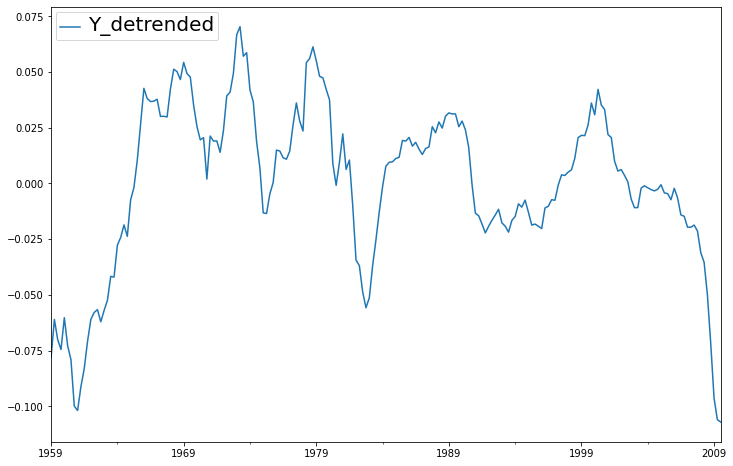

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dta.Y_detrended.plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(20);
legend.prop.set_size(20);
# Se puede ver como un ciclo 

**Tendencias Estocásticas**

Para extraer el componente estocástico de la serie podemos seguir distintos caminos. En este caso vamos a ver el paquete UnobservedComponents de la librería statsmodels. \\

Comenzamos considerando un modelo como el siguiente:

$$ Y_t = \mu_t +\eta_t $$
$$ \mu_{t+1} = \mu_t + \epsilon_{t+1}$$
Es decir la serie $\mu_t$ (la tendencia) es un *random walk* y la perturbación $\eta_t$ es un AR(1) (también se puede modelar como un proceso con más rezagos). Dado que asumimos un proceso para la perturbación vamos a llamar a este modelo, modelo de componentes no observados con ARIMA.


In [ ]:
modelo_ucarima = sm.tsa.UnobservedComponents(Y, 'rwalk',autoregressive=1)
resultado_ucarima = modelo_ucarima.fit(method ='powell', disp=False)
resultado_ucarima.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:              lnrealgdp   No. Observations:                  203
Model:                    random walk   Log Likelihood                 611.674
                              + AR(1)   AIC                          -1217.348
Date:                Wed, 09 Jun 2021   BIC                          -1207.423
Time:                        00:23:17   HQIC                         -1213.333
Sample:                    03-31-1959                                         
                         - 09-30-2009                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
sigma2.level     0.0001   2.76e-05      4.967      0.000    8.31e-05       0.000
sigma2.ar      5.86e-18   2.94e-05   1.99e-13      1.000   -5.77e-05    5.77e-05
ar.L1            0.8900   1.68e-22    5.3e+21      0.000       0.890       0.890
===================================================================================
Ljung-Box (Q):                       61.63   Jarque-Bera (JB):                10.70
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.26e+50. Standard errors may be unstable.
"""

In [ ]:
Y_predict_ucarima = resultado_ucarima.predict()
dta["Y_hat_ucarima"] = Y_predict_ucarima

In [ ]:
#Detrended series
dta["Y_detrended_ucarima"] = dta['lnrealgdp'] - dta['Y_hat_ucarima']

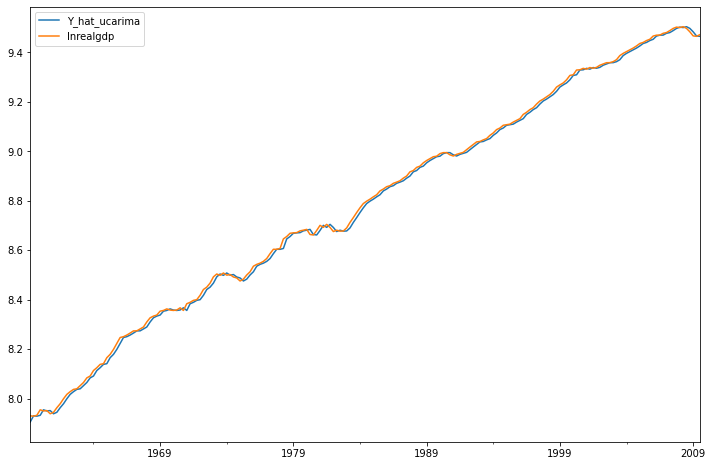

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dta.Y_hat_ucarima[1:].plot(ax=ax);
dta.lnrealgdp[1:].plot(ax=ax);
legend = ax.legend(loc = 'upper left');

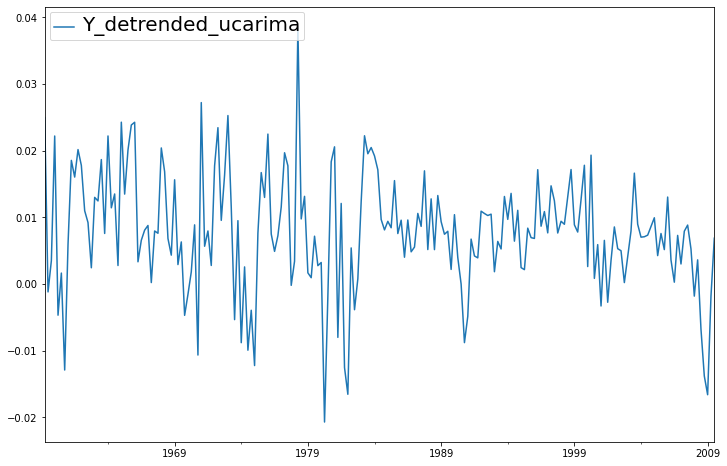

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dta.Y_detrended_ucarima[1:].plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(20);
legend.prop.set_size(20);

**Desestacionalización**

Retiramos la estacionalidad de las series usando paquetes como el ARIMA X11 o ARIMA X13. Ambos filtros se basan en modelar la serie como un ARIMA. 


In [ ]:
# sa hace referencia a seasonal adjusted 
#Y_sa_resultado = sm.tsa.seasonal_decompose(Y, model = 'multiplicative')
Y_sa_resultado =sm.tsa.seasonal_decompose(Y, model = 'additive')

In [ ]:
Y_sa_resultado.resid

,lnrealgdp
1959-03-31,NaN
1959-06-30,NaN
1959-09-30,-0.001878
1959-12-31,-0.005569
1960-03-31,0.010443
...,...
2008-09-30,0.004698
2008-12-31,0.001442
2009-03-31,-0.007986
2009-06-30,NaN


In [ ]:
print(Y_sa_resultado.trend)
print(Y_sa_resultado.seasonal)
print(Y_sa_resultado.observed)
print(Y_sa_resultado.resid)

            lnrealgdp
1959-03-31        NaN
1959-06-30        NaN
1959-09-30   7.929996
1959-12-31   7.938651
1960-03-31   7.943956
...               ...
2008-09-30   9.492205
2008-12-31   9.483126
2009-03-31   9.475069
2009-06-30        NaN
2009-09-30        NaN

[203 rows x 1 columns]
            lnrealgdp
1959-03-31  -0.000132
1959-06-30   0.000674
1959-09-30   0.000464
1959-12-31  -0.001005
1960-03-31  -0.000132
...               ...
2008-09-30   0.000464
2008-12-31  -0.001005
2009-03-31  -0.000132
2009-06-30   0.000674
2009-09-30   0.000464

[203 rows x 1 columns]
            lnrealgdp
1959-03-31   7.904833
1959-06-30   7.929775
1959-09-30   7.928582
1959-12-31   7.932076
1960-03-31   7.954267
...               ...
2008-09-30   9.497367
2008-12-31   9.483562
2009-03-31   9.466950
2009-06-30   9.465099
2009-09-30   9.471961

[203 rows x 1 columns]
            lnrealgdp
1959-03-31        NaN
1959-06-30        NaN
1959-09-30  -0.001878
1959-12-31  -0.005569
1960-03-31   0.010443
... 

In [ ]:
dta["Y_sa"] = Y_sa_resultado.trend
dta["Y_sa_seasonal"] = Y_sa_resultado.seasonal

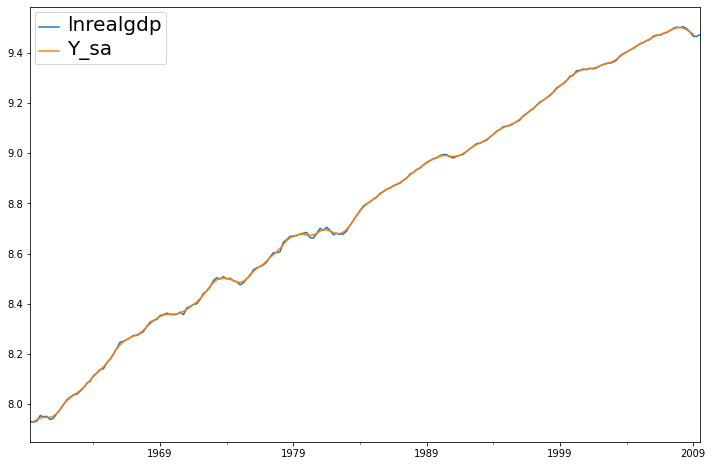

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dta.lnrealgdp[1:].plot(ax=ax);
dta.Y_sa[1:].plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(20);
legend.prop.set_size(20);

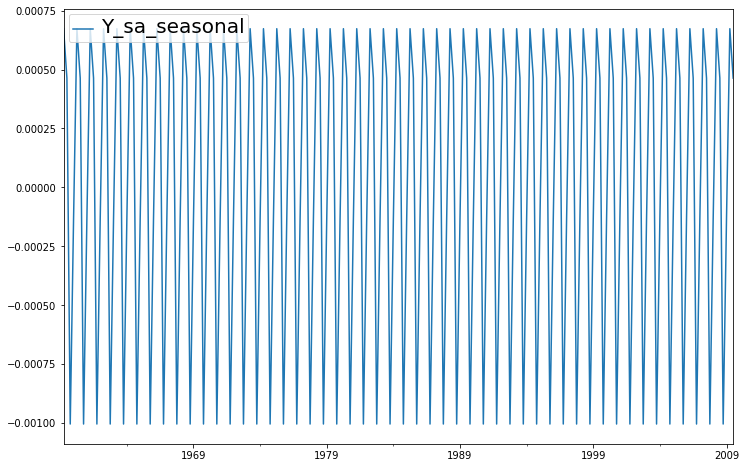

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dta.Y_sa_seasonal[1:].plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(20);
legend.prop.set_size(20);

**Ciclo Económico**

Usamos paquetes de filtros de sm.tsa.filters como el filtro HP, BK o CF

Filtro HP

In [ ]:
Y_cycle_hp, Y_trend_hp = sm.tsa.filters.hpfilter(dta.lnrealgdp,1600)

dta['Y_cycle_hp'] = Y_cycle_hp
dta['Y_trend_hp'] = Y_trend_hp

In [ ]:
dta

,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,ttrend,lnrealgdp,Y_hat,Y_detrended,Y_hat_ucarima,Y_detrended_ucarima,Y_sa,Y_sa_seasonal,Y_cycle_hp,Y_trend_hp
1959-03-31,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00,1,7.904833,7.982920,-0.078088,0.000000,7.904833,NaN,-0.000132,0.008678,7.896154
1959-06-30,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74,2,7.929775,7.990822,-0.061047,7.904833,0.024942,NaN,0.000674,0.024246,7.905529
1959-09-30,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09,3,7.928582,7.998724,-0.070142,7.929775,-0.001193,7.929996,0.000464,0.013674,7.914908
1959-12-31,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06,4,7.932076,8.006625,-0.074549,7.928582,0.003495,7.938651,-0.001005,0.007763,7.924314
1960-03-31,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19,5,7.954267,8.014527,-0.060260,7.932076,0.022190,7.943956,-0.000132,0.020492,7.933774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33,199,9.497367,9.547438,-0.050070,9.504149,-0.006781,9.492205,0.000464,0.007329,9.490038
2008-12-31,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91,200,9.483562,9.555339,-0.071777,9.497367,-0.013805,9.483126,-0.001005,-0.008539,9.492102
2009-03-31,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71,201,9.466950,9.563241,-0.096290,9.483562,-0.016612,9.475069,-0.000132,-0.027111,9.494061
2009-06-30,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19,202,9.465099,9.571142,-0.106043,9.466950,-0.001851,NaN,0.000674,-0.030870,9.495969


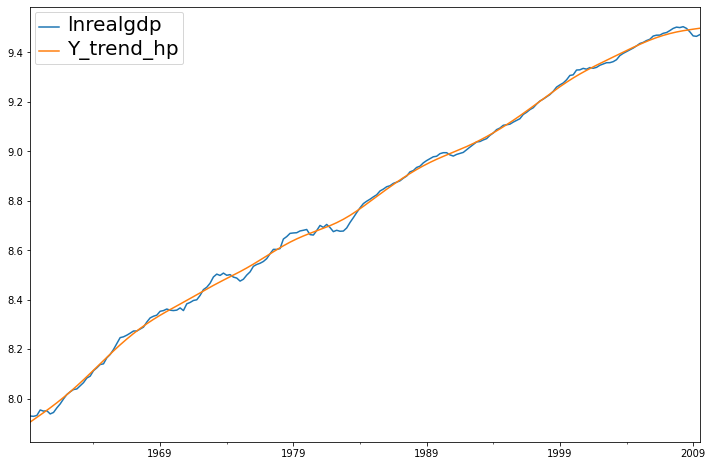

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dta.lnrealgdp[1:].plot(ax=ax);
dta.Y_trend_hp[1:].plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(20);
legend.prop.set_size(20);

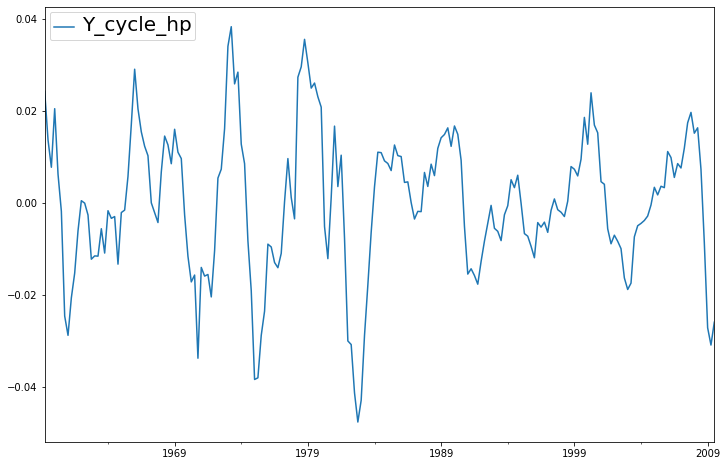

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dta.Y_cycle_hp[1:].plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(20);
legend.prop.set_size(20);

Filtro BK

In [ ]:
Y_cycle_bk = sm.tsa.filters.bkfilter(dta.lnrealgdp)
dta['Y_cycle_bk'] = Y_cycle_bk

In [ ]:
# Trend
dta["Y_trend_bk"] = dta['lnrealgdp'] - dta['Y_cycle_bk']

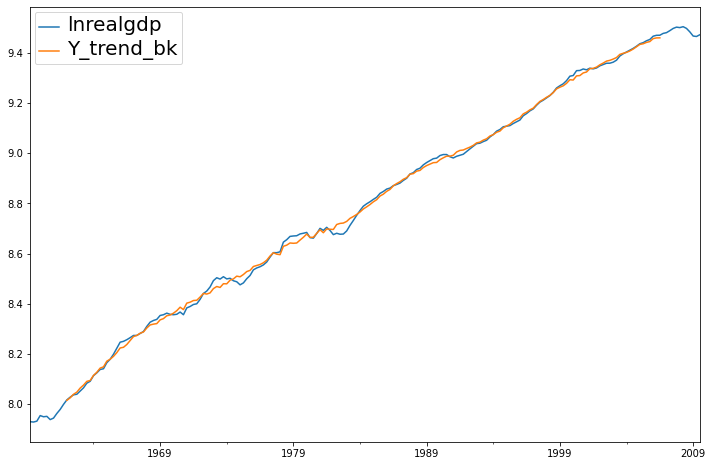

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dta.lnrealgdp[1:].plot(ax=ax);
dta.Y_trend_bk[1:].plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(20);
legend.prop.set_size(20);

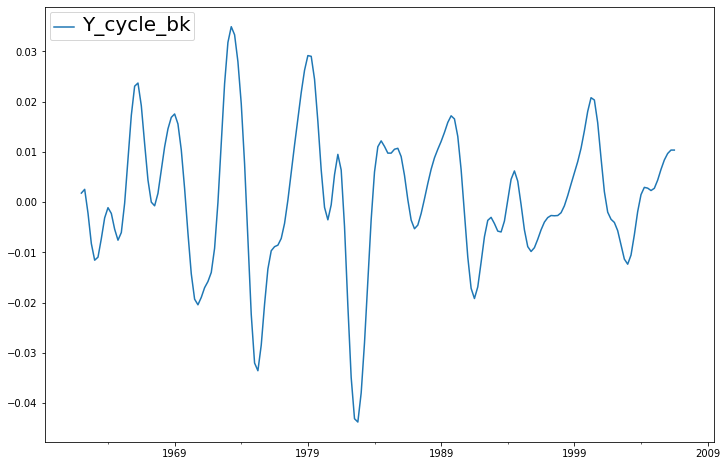

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dta.Y_cycle_bk[1:].plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(20);
legend.prop.set_size(20);

Filtro CF

In [ ]:
Y_cycle_cf ,Y_trend_cf = sm.tsa.filters.cffilter(dta.lnrealgdp)

In [ ]:
dta['Y_cycle_cf'] = Y_cycle_cf
dta['Y_trend_cf'] = Y_trend_cf

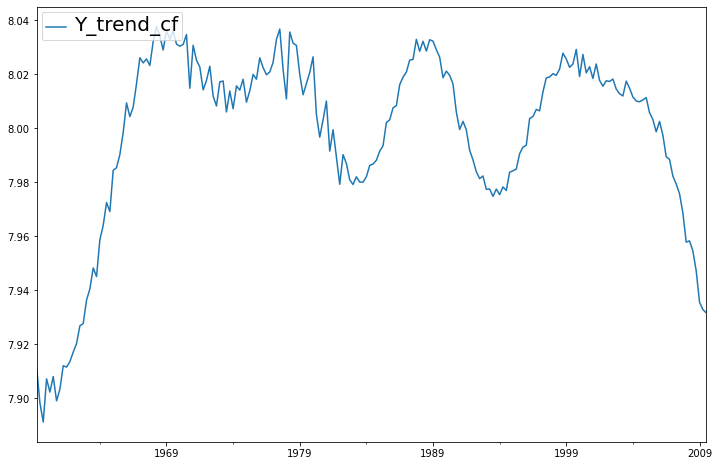

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dta.Y_trend_cf[1:].plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(20);
legend.prop.set_size(20);

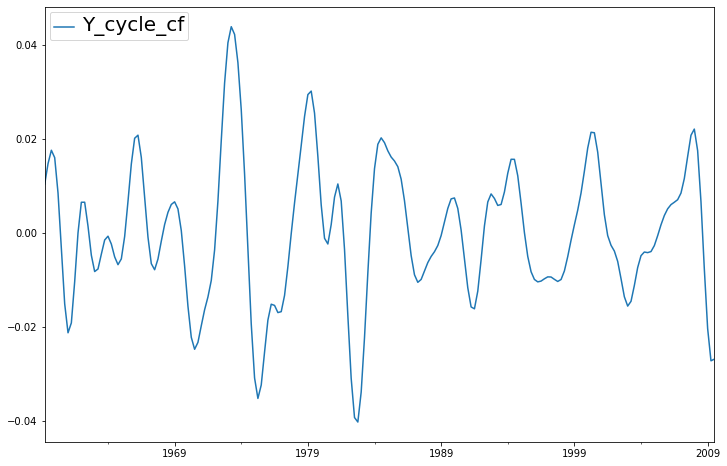

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dta.Y_cycle_cf[1:].plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(20);
legend.prop.set_size(20);

Comparamos los ciclos

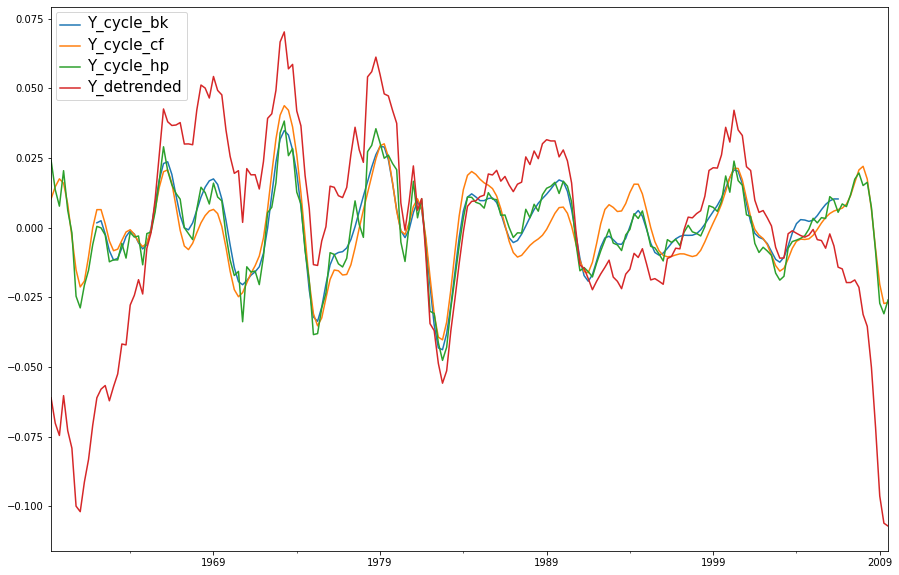

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
dta.Y_cycle_bk[1:].plot(ax=ax);
dta.Y_cycle_cf[1:].plot(ax=ax);
dta.Y_cycle_hp[1:].plot(ax=ax);
dta.Y_detrended[1:].plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(15);


**Correlaciones Dinámicas**

La varianza del coeficiente de correlación cruzada (correlación entre variables) bajo la hipótesis nula de no correlación se aproxima a $1/n$ en donde $n$ es el tamaño de la serie. Entonces los valores críticos se aproximan a $+-\dfrac{2}{\sqrt{n}}$


No handles with labels found to put in legend.


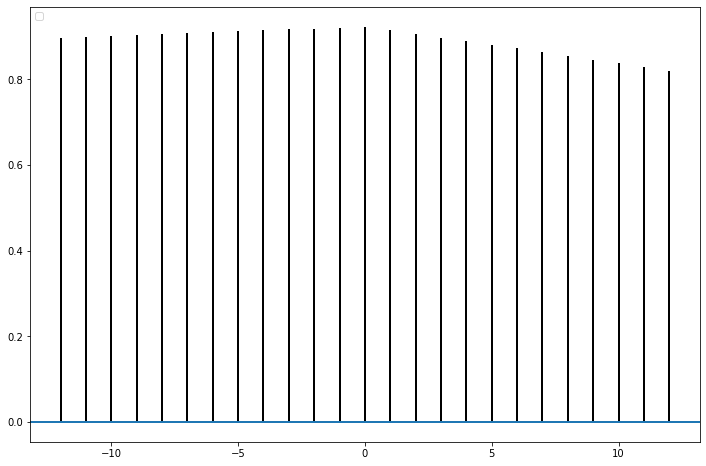

In [ ]:
ci = 2 / np.sqrt(203)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.xcorr(dta.lnrealgdp, dta.realcons, usevlines=True, maxlags=12, normed=True, lw=2)
legend = ax.legend(loc = 'upper left');
#ax.grid(True)

#ax.hlines(y=ci, xmin=-12, xmax=12, linewidth=2, color='r')
#ax.hlines(y=-ci, xmin=-12, xmax=12, linewidth=2, color='r')

plt.show()


# FALTA AGREGAR INTERVALOS DE CONFIANZAA!!!!!!!!!!!!
# ¿Como se agrega? -> Google 